# Capstone Project - Tonya Kirker
## Predicting Alex Ovechkin's Shooting Percentage 

### Pitch: Using data sets from https://www.hockey-reference.com/players/o/ovechal01/gamelog/, I will aim to predict Alex Ovechkin's shooting percentage based on features such as number of games played, time on ice, and shots, among others.

In [184]:
from IPython.display import HTML 
 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   

plt.style.use('fivethirtyeight')


plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Exploratory Data Analysis 

In [185]:
ovechkin = pd.read_csv('ovechkin_data.csv')
ovechkin
#Data on Ovechkin's regular season dating back to the 2010-2011 season

,Goals,Assists,PTS,+/-,Penalty Infraction Minutes,EV,PP,GW,Shots on Goal,Shooting Percentage,Shifts,Time on Ice (Minutes:Seconds),TOI
0,3,0,3,3,0,3,0,0,6,50.0,22,19:11,1151
1,4,0,4,3,0,3,1,0,8,50.0,20,17:44,1064
2,0,0,0,-2,0,0,0,0,4,0.0,20,17:09,1029
3,1,0,1,1,0,1,0,0,7,14.3,18,19:36,1176
4,1,1,2,0,0,0,1,0,4,25.0,22,19:00,1140
5,0,0,0,-4,0,0,0,0,6,0.0,19,14:25,865
6,0,0,0,-1,2,0,0,0,4,0.0,20,20:44,1244
7,1,0,1,-1,0,0,1,1,7,14.3,16,19:45,1185
8,0,0,0,-1,0,0,0,0,4,0.0,20,17:30,1050
9,0,1,1,-1,2,0,0,0,3,0.0,23,21:32,1292


In [186]:
ovechkin.shape

(529, 13)

In [187]:
ovechkin.head(10)

,Goals,Assists,PTS,+/-,Penalty Infraction Minutes,EV,PP,GW,Shots on Goal,Shooting Percentage,Shifts,Time on Ice (Minutes:Seconds),TOI
0,3,0,3,3,0,3,0,0,6,50.0,22,19:11,1151
1,4,0,4,3,0,3,1,0,8,50.0,20,17:44,1064
2,0,0,0,-2,0,0,0,0,4,0.0,20,17:09,1029
3,1,0,1,1,0,1,0,0,7,14.3,18,19:36,1176
4,1,1,2,0,0,0,1,0,4,25.0,22,19:00,1140
5,0,0,0,-4,0,0,0,0,6,0.0,19,14:25,865
6,0,0,0,-1,2,0,0,0,4,0.0,20,20:44,1244
7,1,0,1,-1,0,0,1,1,7,14.3,16,19:45,1185
8,0,0,0,-1,0,0,0,0,4,0.0,20,17:30,1050
9,0,1,1,-1,2,0,0,0,3,0.0,23,21:32,1292


In [211]:
print(ovechkin.columns)

Index(['Goals ', 'Assists ', 'PTS', '+/-', 'Penalty Infraction Minutes ', 'EV',
       'PP', 'GW', 'SOG', 'Shooting Percentage ', 'Shifts ',
       'Time on Ice (Minutes:Seconds)', 'TOI '],
      dtype='object')


In [236]:
# Renaming the columns because I have some spaces that will cause errors
ovechkin.rename(columns={'Penalty Infraction Minutes ':'PIM'}, inplace=True)
ovechkin.rename(columns={'Shots on Goal':'SOG'}, inplace=True)
ovechkin.rename(columns={'+/-':'plusorminus'}, inplace=True)
ovechkin.rename(columns={'Shooting Percentage ':'shootpercent'}, inplace=True)
ovechkin.rename(columns={'Goals ':'Goals'}, inplace=True)
ovechkin.rename(columns={'Assists ':'Assists'}, inplace=True)
ovechkin.rename(columns={'Shifts ':'Shifts'}, inplace=True)
ovechkin.rename(columns={'TOI ':'TOI'}, inplace=True)

In [237]:
ovechkin.describe()

,Goals,Assists,PTS,plusorminus,PIM,EV,PP,GW,SOG,shootpercent,Shifts,TOI
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,520.000000,529.000000,529.000000
mean,0.567108,0.431002,0.998110,0.058601,0.601134,0.330813,0.236295,0.109641,4.601134,12.130769,21.623819,1213.782609
std,0.746035,0.659619,1.015969,1.312226,1.110248,0.579164,0.475664,0.312737,2.282526,16.660885,2.335554,143.679963
min,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,834.000000
25%,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,20.000000,1116.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,22.000000,1214.000000
75%,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,6.000000,20.000000,23.000000,1316.000000
max,4.000000,3.000000,4.000000,4.000000,6.000000,3.000000,3.000000,1.000000,15.000000,100.000000,34.000000,1561.000000


In [238]:
ovechkin.groupby('TOI').describe()

Assists                                              EV       ...    \
       count mean       std  min   25%  50%   75%  max count mean  ...     
TOI                                                                ...     
834      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
852      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
859      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
865      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
894      1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
895      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  2.0  ...     
905      1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
913      1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  1.0  ...     
918      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
920      1.0  2.0       NaN  2.0  2.00  2.0  2.00  2.0   1.0  0.0  ...     
924      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  0.0  ...     
927      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
929      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  2.0  ...     
930      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
942      1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  1.0  ...     
946      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
958      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
960      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
961      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
962      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
967      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  1.0  ...     
969      1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
970      1.0  2.0       NaN  2.0  2.00  2.0  2.00  2.0   1.0  1.0  ...     
971      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  1.0  ...     
973      1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
975      1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
977      1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  1.0  ...     
979      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  1.0  ...     
982      1.0  3.0       NaN  3.0  3.00  3.0  3.00  3.0   1.0  0.0  ...     
989      1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  1.0  ...     
...      ...  ...       ...  ...   ...  ...   ...  ...   ...  ...  ...     
1438     1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
1439     1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
1444     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1445     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1448     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1451     1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
1457     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1465     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1468     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1475     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  1.0  ...     
1478     2.0  0.5  0.707107  0.0  0.25  0.5  0.75  1.0   2.0  0.0  ...     
1479     1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  0.0  ...     
1483     2.0  0.0  0.000000  0.0  0.00  0.0  0.00  0.0   2.0  0.0  ...     
1484     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  1.0  ...     
1487     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1491     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1494     1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  1.0  ...     
1496     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  0.0  ...     
1501     1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.

In [239]:
ovechkin.PTS.mean()

0.998109640831758

In [240]:
ovechkin.dtypes

Goals                              int64
Assists                            int64
PTS                                int64
plusorminus                        int64
PIM                                int64
EV                                 int64
PP                                 int64
GW                                 int64
SOG                                int64
shootpercent                     float64
Shifts                             int64
Time on Ice (Minutes:Seconds)     object
TOI                                int64
dtype: object

In [241]:
ovechkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 13 columns):
Goals                            529 non-null int64
Assists                          529 non-null int64
PTS                              529 non-null int64
plusorminus                      529 non-null int64
PIM                              529 non-null int64
EV                               529 non-null int64
PP                               529 non-null int64
GW                               529 non-null int64
SOG                              529 non-null int64
shootpercent                     520 non-null float64
Shifts                           529 non-null int64
Time on Ice (Minutes:Seconds)    529 non-null object
TOI                              529 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 53.8+ KB


In [242]:
ovechkin.nunique()

Goals                              5
Assists                            4
PTS                                5
plusorminus                       10
PIM                                5
EV                                 4
PP                                 4
GW                                 2
SOG                               14
shootpercent                      22
Shifts                            16
Time on Ice (Minutes:Seconds)    348
TOI                              348
dtype: int64

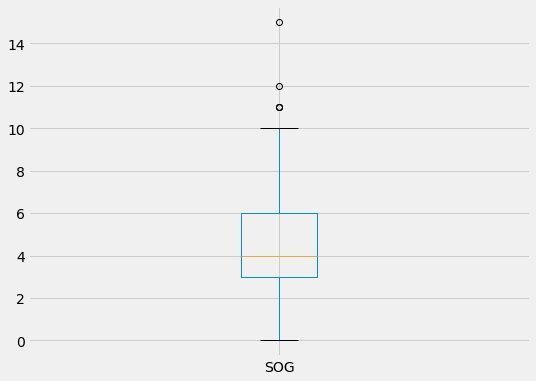

In [243]:
ovechkin['SOG'].plot(kind='box');

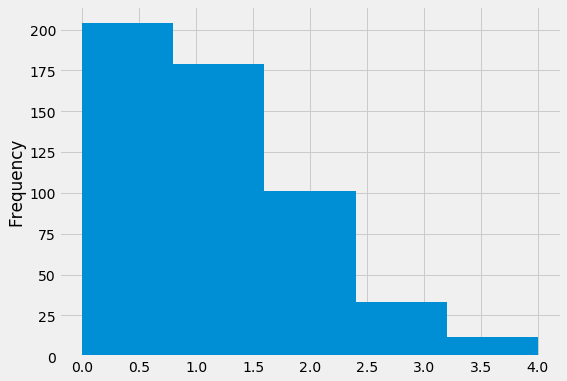

In [244]:
ovechkin['PTS'].plot(kind='hist', bins=5)

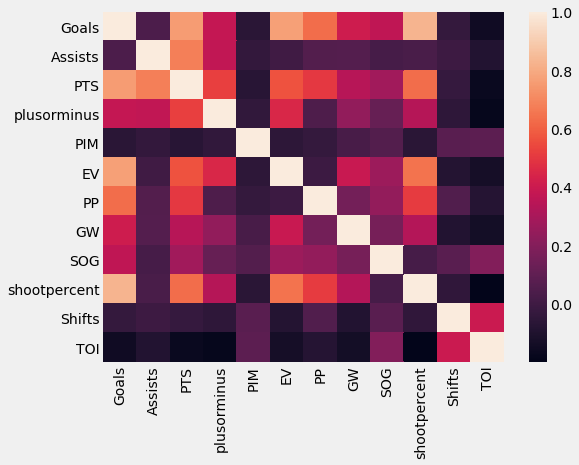

In [245]:
subject_correlations = ovechkin.corr()
sns.heatmap(subject_correlations);

# Building a Model

In [258]:
# Create X and y.
features = ['TOI', 'SOG', 'Shifts']
y = ovechkin['shootpercent']
X = ovechkin[features]

In [259]:
# Check X's type.
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [260]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [261]:
# Check X's shape (n = number of observations, p = number of features).
print((X.shape))

(529, 3)


In [262]:
# Check y's shape (single dimension with length n).
# The comma indicates the datatype is a tuple.
print((y.shape))

(529,)


In [263]:
from sklearn.linear_model import LinearRegression

In [266]:
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [265]:
lr.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [267]:
# Per future warning, one-dimensional arrays must be reshaped using the following.
lr.predict(np.array([0]).reshape(1,-1))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [83]:
X_new = [[50], [80]]
lr.predict(X_new)
#How much time on ice would it take to score certain amounts of points?

array([1541.26447933, 1608.37097388])